<a href="https://colab.research.google.com/github/Estebanc0/ADA-Informes/blob/main/Informe11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis del problema
El problema consiste en minimizar el costo al conectar objetos, para ello se utilizarán nodos(objetos) y conexiones (peso = valor).



Entrada: Grafo no dirigido G = [V, E], que contiene el costo de cada arco (E) y los nodos (V).



Salida: Un árbol de expansión mínimo. Que indica las conexiones entre los nodos y el peso correspondiente, además del costo mínimo del árbol

# Análisis del algoritmo:




1. Se crea G, conjunto vacío.



2. Se ordena de forma ascendente los arcos del grafo, según los costos.



3. Se busca el arco de menor costo, como el arco inicial.



4. Si el arco seleccionado conecta dos vértices distintos, entonces agregamos la arista verificando que no se formen ciclos. Si forma un ciclo no se agrega al árbol.



5. Continuamos el proceso hasta marcar todos los arcos.


# Ejemplo
Digamos que queremos encontrar el MST del grafo no dirigido, ponderado y conectado subyacente con 6 vértices y 9 bordes
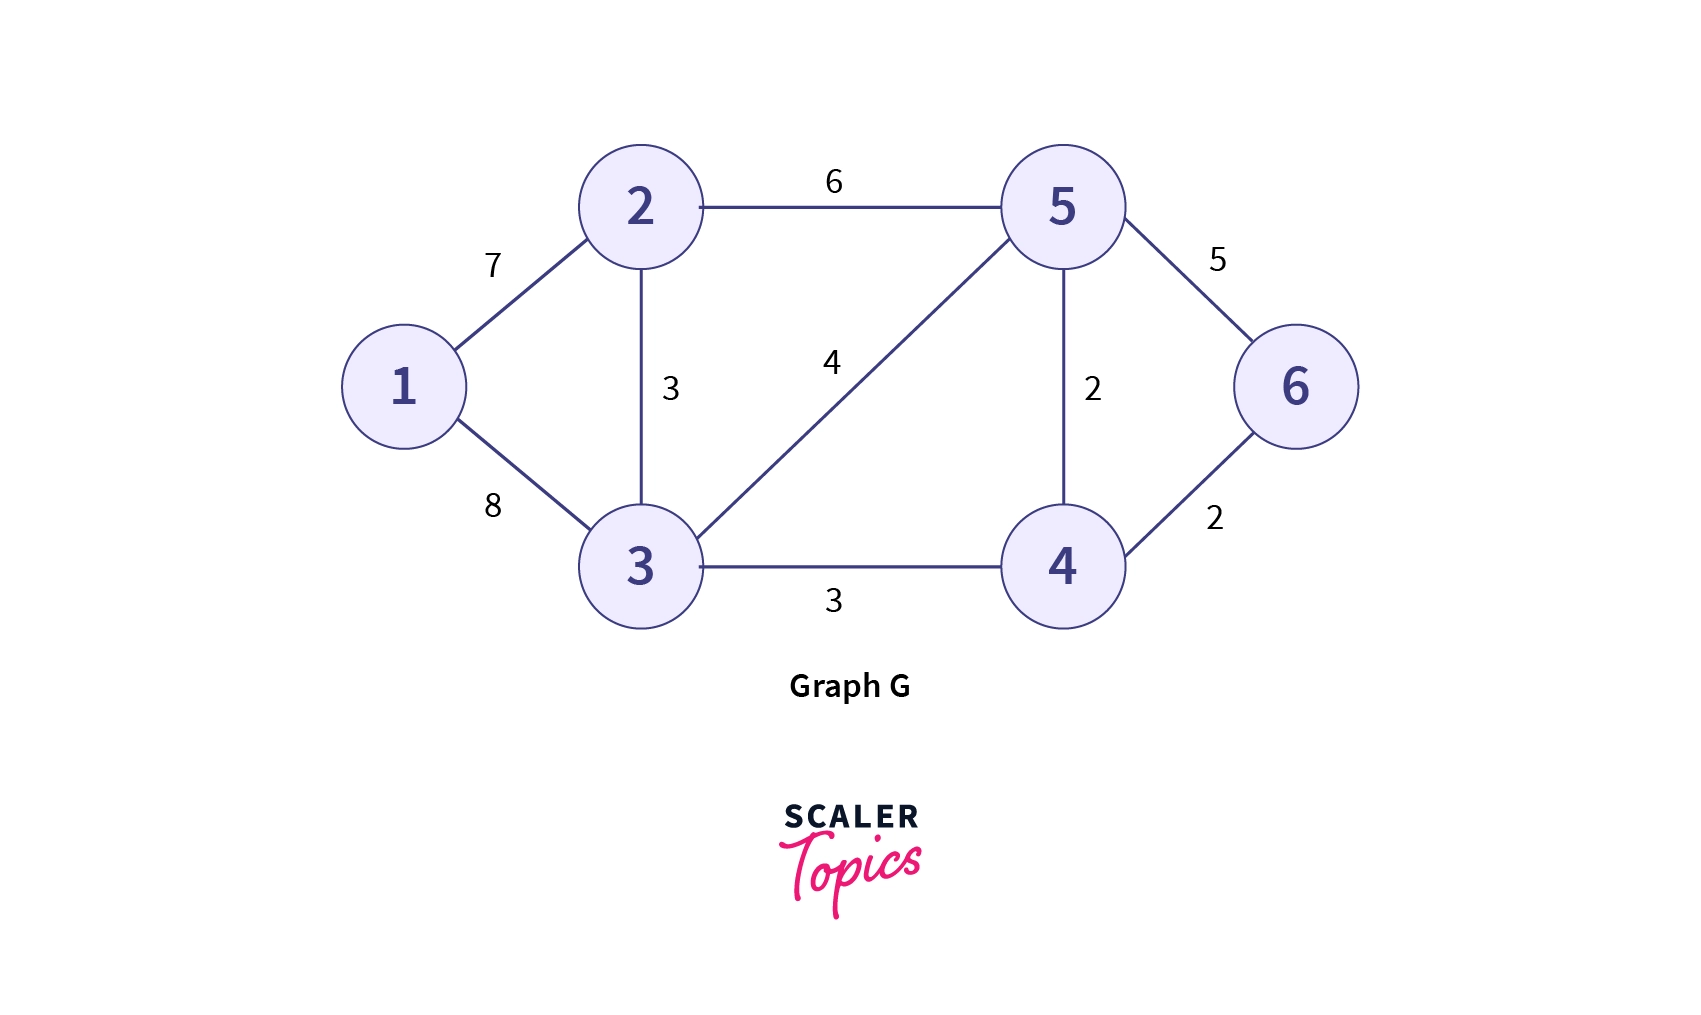


elejimos 5 aristas desde el principio que no formen un ciclo.

Comprobación de borde 4⟺5 Este es el primer borde, por lo que no puede formar ningún ciclo, por lo tanto, incluye esto en el resultado 

Comprobación de borde 3⟺4, Incluir esta arista en el resultado no forma ningún ciclo.

Comprobación de borde 2⟺3, Nuevamente, incluir este borde en el resultado no forma ningún ciclo.

Comprobación de borde 3⟺5, Incluir este borde en el resultado forma un ciclo 3→4→5→3, por lo tanto, no incluir esto en el resultado.

Comprobación de borde 5⟺6, Incluir este borde en el resultado forma un ciclo 4→5→6→4, por lo tanto, no incluir esto en el resultado.

Comprobación de borde 2⟺5, Incluir este borde en el resultado forma un ciclo 2→3→4→5→2, por lo tanto, no incluir esto en el resultado.

Comprobación de borde 1⟺2, Incluir esta arista en el resultado no forma ningún ciclo. Al incluir esto, hemos incluido 5 aristas , por lo que ahora el resultado corresponderá al árbol de expansión mínimo.

Después de incluir los 5 bordes, el MST se verá así:
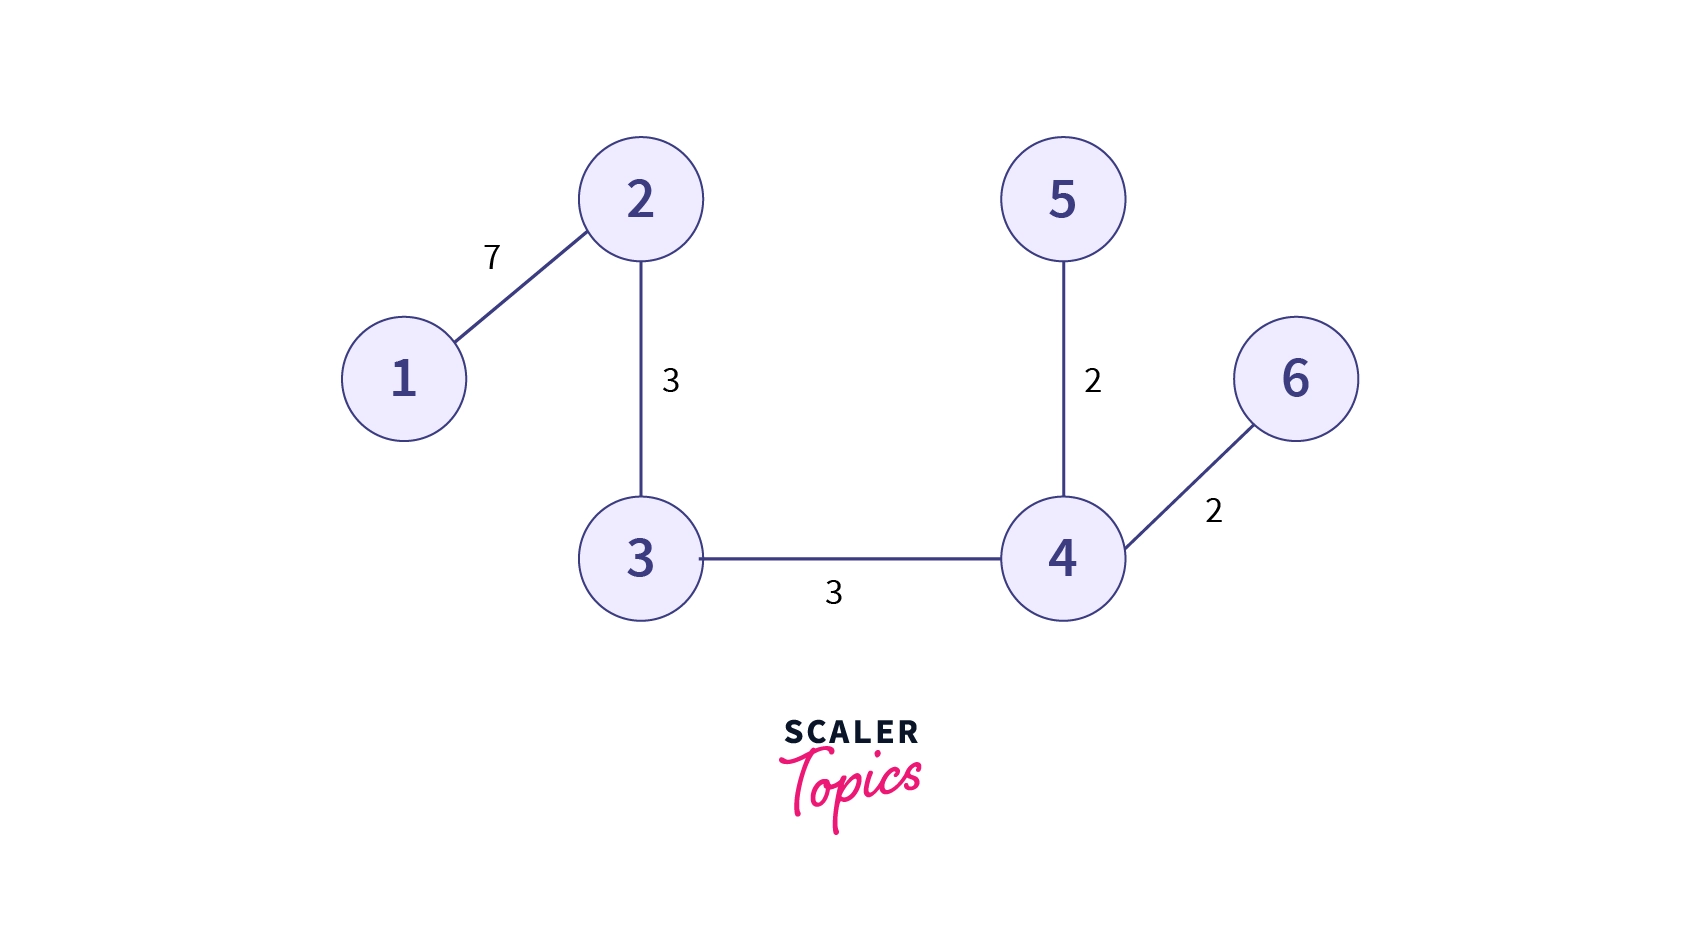
Entonces, el peso de MST se puede calcular como 7+3+3+2+2=17.

In [ ]:

import random
import networkx as nx
import matplotlib.pyplot as plt
class Graph:
    def graph_to_nxgraph(self,G):
      X = []
      arbol = nx.Graph()
      for u, v, w in G:
          if(u not in X):
              X.append(u)
              arbol.add_node(u)
          if(v not in X):
              X.append(v)
              arbol.add_node(v)
          arbol.add_edge(u,v, weight = w)
      return arbol

    def __init__(self, vertices):
        self.V = vertices  # No. of vertices
        self.graph = []
        # to store graph
 
    # function to add an edge to graph
    def addEdge(self, u, v, w):
        self.graph.append([u, v, w])
 
    # A utility function to find set of an element i
    # (truly uses path compression technique)
    def find(self, parent, i):
        if parent[i] != i:
          # Reassignment of node's parent to root node as
          # path compression requires
            parent[i] = self.find(parent, parent[i])
        return parent[i]
 
    # A function that does union of two sets of x and y
    # (uses union by rank)
    def union(self, parent, rank, x, y):
        
        # Attach smaller rank tree under root of
        # high rank tree (Union by Rank)
        if rank[x] < rank[y]:
            parent[x] = y
        elif rank[x] > rank[y]:
            parent[y] = x
 
        # If ranks are same, then make one as root
        # and increment its rank by one
        else:
            parent[y] = x
            rank[x] += 1
 
    def showGraph(self, r):
      T = self.graph_to_nxgraph(r)
      pos=nx.spring_layout(T)
      labels = nx.get_edge_attributes(T,'weight')
      nx.draw_networkx_edge_labels(T,pos,edge_labels=labels,font_size=14)
      nx.draw(T,pos, node_color="pink", with_labels=True, node_size=800, font_color="white", font_size=14, font_weight="black", width=2.0, edge_color ="black")


    # The main function to construct MST using Kruskal's
        # algorithm
    def KruskalMST(self,visualize=False):
 
        result = []  # This will store the resultant MST
 
        # An index variable, used for sorted edges
        i = 0
 
        # An index variable, used for result[]
        e = 0
 
        # Step 1:  Sort all the edges in
        # non-decreasing order of their
        # weight.  If we are not allowed to change the
        # given graph, we can create a copy of graph
        self.graph = sorted(self.graph,
                            key=lambda item: item[2])
 
        parent = []
        rank = []
 
        # Create V subsets with single elements
        for node in range(self.V):
            parent.append(node)
            rank.append(0)
 
        # Number of edges to be taken is equal to V-1
        while e < self.V - 1:
 
            # Step 2: Pick the smallest edge and increment
            # the index for next iteration
            u, v, w = self.graph[i]
            i = i + 1
            x = self.find(parent, u)
            y = self.find(parent, v)
 
            # If including this edge doesn't
            # cause cycle, then include it in result
            # and increment the index of result
            # for next edge
            if x != y:
                e = e + 1
                result.append([u, v, w])
                self.union(parent, rank, x, y)
            # Else discard the edge

        if visualize==True:
          grafo.showGraph(grafo.graph)    
        return result
        
 
 

 

In [ ]:
import random

#Generador de instancias
def graph_instance_creator(V):
  grafo = Graph(V)
  for i in range(V):
    for j in range(i+1, V):
      grafo.graph.append([i, j, random.randint(1, 100)])
  
  return grafo

Grafo aleatorio: 
[[1, 3, 9], [0, 3, 14], [1, 2, 46]]
1 -- 3 == 9
0 -- 3 == 14
1 -- 2 == 46
Minimum Spanning Tree 69


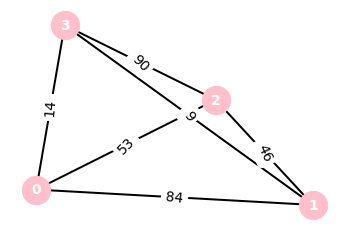

In [ ]:
grafo = graph_instance_creator(4)
print("Grafo aleatorio: ")
aux= grafo.KruskalMST(True)
print(aux)
minimumCost =0
for u, v, weight in grafo.KruskalMST():
    minimumCost += weight
    print("%d -- %d == %d" % (u, v, weight))
print("Minimum Spanning Tree", minimumCost)

# Tiempo de ejecución
clasificar los E bordes nos cuesta un tiempo de O(E * log(E)).



Para cada borde, estamos usando el algoritmo Union-Find que nos cuesta un tiempo de ( E ∗ α(V)).





Por lo tanto, la complejidad total del tiempo es O(E * log(E)+E)≃ O(E * log(E) lo que resulta en un tiempo de  O(E * log(E)) o O(E * log(V))

# Correctitud
Teorema: el algoritmo de Kruskal encuentra un árbol de expansión mínimo.

Prueba: Sea G = (V, E) un gráfico conexo ponderado. Sea T el conjunto de aristas que crece en el algoritmo de Kruskal. La prueba es por inducción matemática sobre el número de aristas en T.

Mostramos que si T es prometedor en cualquier etapa del algoritmo, entonces sigue siendo prometedor cuando se le agrega una nueva ventaja en el algoritmo de Kruskal.
Cuando el algoritmo termina, sucederá que T da una solución al problema y por lo tanto un MST.
Base: T =  $ \phi$es prometedor ya que un gráfico conectado ponderado siempre tiene al menos un MST.
Paso de inducción: Sea T prometedor justo antes de agregar una nueva arista e = ( u , v ). Los bordes T dividen los nodos de G en uno o más componentes conectados. u y v estarán en dos componentes diferentes. Sea U el conjunto de nodos de la componente que incluye a u. Tenga en cuenta que

U es un subconjunto estricto de V
T es un conjunto prometedor de aristas tal que ninguna arista en T deja U (ya que una arista T tiene ambos extremos en U o no tiene ningún extremo en U)
e es una arista de menor costo que deja U (ya que el algoritmo de Kruskal, siendo codicioso, habría elegido e solo después de examinar aristas más cortas que e)
Las tres condiciones anteriores son precisamente como en el MST Lemma y, por lo tanto, podemos concluir que  T { e } también es prometedor. Cuando el algoritmo se detiene, T proporciona no solo un árbol de expansión, sino un árbol de expansión mínimo, ya que es prometedor. 

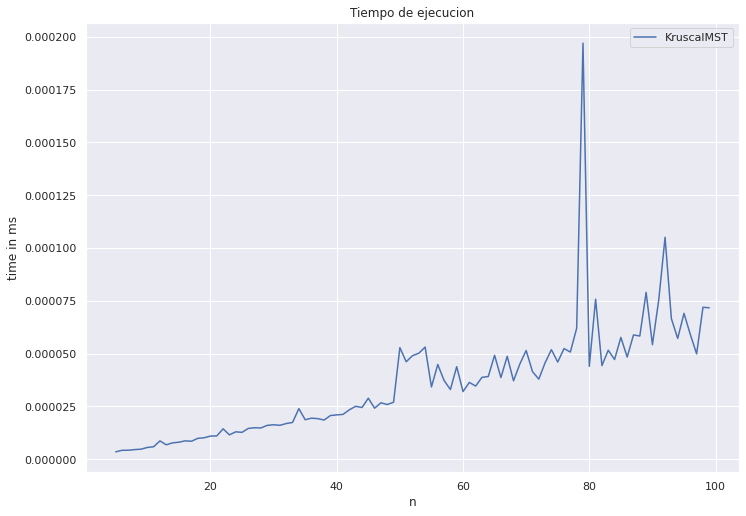

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from timeit import repeat
import numpy as np

%matplotlib inline
sns.set(context='notebook', style='darkgrid', palette='dark')
sns.set(rc={'figure.figsize':(11.7,8.27)})

# Tiempo

x=[]; 
y=[]; 

for n in range(5,100):
  a= graph_instance_creator(n)

  t = repeat(setup="from __main__ import Graph", stmt=f"{a.KruskalMST()}", repeat=1, number=10)
  
  x.append(n)
  y.append(t)


plt.plot(x,y)

plt.legend(["KruscalMST"])
plt.title("Tiempo de ejecucion")

plt.xlabel('n')
plt.ylabel('time in ms')
plt.show()

# Análisis tiempo de ejecución experimental


Como se puede ver en la gráfica a medida que el número de nodos aumenta el tiempo de ejecución igual, esto debido a que es un algoritmo greedy el cual busca la forma más fácil y rápida para resolver el problema.

In [ ]:
import sys

class Graph2():
    def __init__(self, vertices):
        self.V = vertices
        self.graph = [[0 for column in range(vertices)]for row in range(vertices)]
    def printMST(self, parent):
        print("Edge \tWeight")
        for i in range(1, self.V):
            print(parent[i], "-", i, "\t", self.graph[i][parent[i]])
    def MST(self, parent):
        r = []
        for i in range(1, self.V):
            r.append([parent[i], i, self.graph[i][parent[i]]])
        return r
    def minKey(self, key, mstSet):
        min = sys.maxsize
        min_index = -1
        for v in range(self.V):
            if key[v] < min and mstSet[v] == False:
                min = key[v]
                min_index = v
        return min_index
    def primMST(self):
        key = [sys.maxsize] * self.V
        parent = [None] * self.V 
        key[0] = 0
        mstSet = [False] * self.V
        parent[0] = -1  
        for cout in range(self.V):
            u = self.minKey(key, mstSet)
            mstSet[u] = True
            for v in range(self.V):
                if self.graph[u][v] > 0 and mstSet[v] == False and key[v] > self.graph[u][v]:
                    key[v] = self.graph[u][v]
                    parent[v] = u
        
        return self.MST(parent)
def graphToGraph2(G, n):
    g = Graph2(n)

    for u,v,w in G.graph:
        g.graph[u-1][v-1] = w
        g.graph[v-1][u-1] = w
    return g

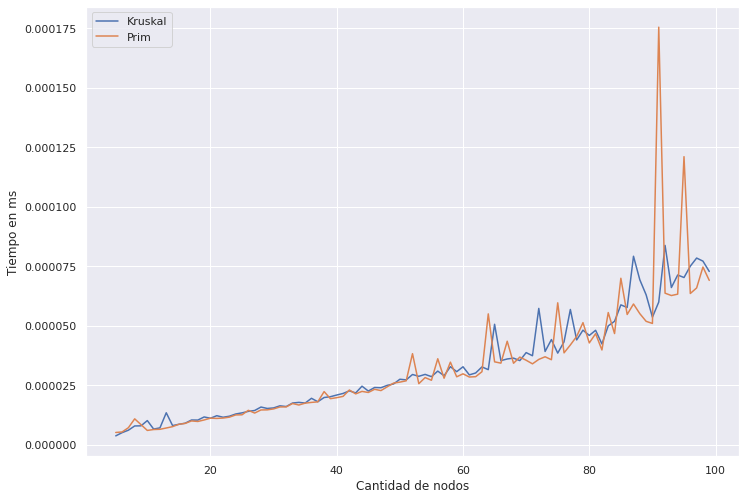

In [ ]:
import matplotlib.pyplot as plt
import datetime
from timeit import repeat

x=[]; y=[]; z=[]

for i in range(5,100):

    grafo = graph_instance_creator(i)
    grafo2 = graphToGraph2(grafo,i)
    a = repeat(setup="from __main__ import Graph", stmt=f"{grafo.KruskalMST()}", repeat=1, number=10)
    b = repeat(setup="from __main__ import Graph2", stmt=f"{grafo2.primMST()}", repeat=1, number=10)

    x.append(i)
    y.append(a)
    z.append(b)

plt.plot(x,y)
plt.plot(x,z)
plt.legend(["Kruskal", "Prim"])

plt.xlabel('Cantidad de nodos')
plt.ylabel('Tiempo en ms')
plt.show()

# Análisis


Al comparar ambos algoritmos se puede ver que son muy similares, pero hay que tener en cuenta que a pesar de que ambos son algoritmos greedys, El algoritmo de Prim se ejecuta más rápido en el caso de gráficos densos, mientras que Kruskal se ejecuta más rápido en el caso de gráficos dispersos esta puede ser la razón por la cual el tiempo de prim se dispara en comparación al tiempo de kruskal en un punto de la gráfica